### Task 1

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.svm import SVC
import lightgbm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pickle

In [5]:
# loading test data and original label
test = pd.read_csv('testing_data_for_kingdom.csv')
original_output = pd.read_csv('y_test_k.csv')

In [53]:
def make_prediction(X, clf_path, class_encoding_path, std_path, col_seq_path, good_features_path ):   
    X = pd.DataFrame(X.values.reshape(1, -1), columns = X.index, dtype = float)
    kingdom_classes = ['Archea', 'Bacteria', 'Eukaryots']
    
    
    #load class encoding
    with open(class_encoding_path, 'rb') as file:
        le = pickle.load(file)
    file.close()
    
    # load std_path file
    with open(std_path, 'rb') as file:
        std_ = pickle.load(file)
    file.close()
    
    # load classifier     
    with open(clf_path, 'rb') as file:
        clf = pickle.load(file)
    file.close()
    
    # load col_seq     
    with open(col_seq_path, 'rb') as file:
        col_seq = pickle.load(file)
    file.close()
    with open(good_features_path, 'rb') as file:
        good_features = pickle.load(file)
    file.close()
    
    
    # function for calculating double feature
    def get_XX_feature(val, f):
        temp = 0
        for col in val.columns:
            if col[0:2]==f or col[-1:-3]==f or (col[0]==f[0] and col[-1]==f[0]):
                try: 
                    temp = temp + float(val.iloc[0][col])
                except:
                    print(f'There has been a error while calculating {f}')
        return temp
    
    # function for calculating single occurance feature
    def get_X_feature(val, f):
        temp = 0
        for col in val.columns:
            if f in col and len(col)==3:
                try:
                    temp = temp + float(val.iloc[0][col])
                except:
                    print(f'There has been a error while calculating {f}')
        return temp
    X_copy = X.copy()
    engineered_cols = ['kurt', 'median', 'mode','var', 'max', 'min', 'q1', 'q2', 'q3', 'std', 'sum', 'UU', 'AA', 'CC', 'GG', 'sum_g', 'sum_a', 'sum_c', 'sum_u']
    kurt = X.kurtosis(axis = 1).values[0]
    med = X.median(axis = 1).values[0]
    mode = X.mode(axis = 1).values[0][0]
    var = X.var(axis = 1).values[0]
    max_ = X.max(axis = 1).values[0]
    min_ = X.min(axis = 1).values[0]
    q1 = X.quantile(0.25, axis = 1).values[0]
    q2 = X.quantile(0.50, axis = 1).values[0]
    q3 = X.quantile(0.75, axis = 1).values[0]
    std = X.std(axis = 1).values[0]
    sum_ = X.sum(axis = 1).values[0]
    UU = get_XX_feature(X, 'UU')
    AA = get_XX_feature(X, 'AA')
    CC = get_XX_feature(X, 'CC')
    GG = get_XX_feature(X, 'GG')
    sum_g = get_X_feature(X, 'G')
    sum_a = get_X_feature(X, 'A')
    sum_c = get_X_feature(X, 'C')
    sum_u = get_X_feature(X, 'U')
    
    X['kurt'] = kurt
    X['median'] = med
    X['mode'] = mode
    X['var'] = var
    X['max'] = max_
    X['min'] = min_
    X['q1'] = q1
    X['q2'] = q2
    X['q3'] = q3
    X['std'] = std
    X['sum'] = sum_
    X['UU'] = UU
    X['AA'] = AA
    X['CC'] = CC
    X['GG'] = GG
    X['sum_g'] = sum_g
    X['sum_a'] =sum_a
    X['sum_c'] = sum_c
    X['sum_u'] = sum_u
    
    X = pd.DataFrame(std_.transform(X, ), columns = X.columns)
    
    X = X[good_features]
    pred = clf.predict(X)
    
    return pred, kingdom_classes[pred[0]], X.values.tolist()[0]

idx = 144
pred, class_, d = make_prediction(test.iloc[idx], 'clf_kingdom_svm.pkl' , 'class_encoding_kingdom.pkl', 'std_kingdom.pkl', 'col_seq_kingdom.pkl', 'good_features_kingdom.pkl')
print("Predicted:", class_, "       Original:", original_output.iloc[idx]['Kingdom'])

Predicted: Archea        Original: arc


**Model Evaluation**

In [13]:
def evaluate(X, Y):
    data = []
    output = []
    ouput_class = []
    
    
        #load class encoding
    with open('class_encoding_kingdom.pkl', 'rb') as file:
        le = pickle.load(file)
    file.close()
    
    Y = le.transform(original_output)
    
    
    for i in range(len(X)):
        pred, _, d = make_prediction(X.iloc[i], 'clf_kingdom_svm.pkl' , 'class_encoding_kingdom.pkl', 'std_kingdom.pkl', 'col_seq_kingdom.pkl', 'good_features_kingdom.pkl')
        output.append(pred[0])
        ouput_class.append(_)
        data.append(d)
    f1_score_val_micro = f1_score(Y, output, average = 'micro')
    f1_score_val_macro = f1_score(Y, output, average = 'macro')
    
    return f1_score_val_micro, f1_score_val_macro, ouput_class, data

f1_score_val_micro, f1_score_val_macro, out, temp_data = evaluate(test, original_output)

C:\Users\HPvns\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
print('Test F1score_macro for Task 1 is ', f1_score_val_macro)

Test F1score_macro for Task 1 is  0.9534092033504796


### Task 2

In [55]:
test = pd.read_csv('testing_data_for_dnatype.csv')
original_output = pd.read_csv('y_test_d.csv')

In [60]:
def make_prediction(X, clf_path ):   
    X = pd.DataFrame(X.values.reshape(1, -1), columns = X.index, dtype = float)
    DNAtype_classes = ['genomic', 'mitochondrial', 'chloroplast']
    
    # load classifier     
    with open(clf_path, 'rb') as file:
        clf = pickle.load(file)
    file.close()
    
    
    # function for calculating double feature
    def get_XX_feature(X, f):
        temp = 0
        for col in X.columns:
            if col[0:2]==f or col[-1:-3]==f or (col[0]==f[0] and col[-1]==f[0]):
                try: 
                    temp = temp + float(X.iloc[0][col])
                except:
                    print(f'There has been a error while calculating {f}')
        return temp
    
    # function for calculating single occurance feature
    def get_X_feature(X, f):
        temp = 0
        for col in X.columns:
            if f in col and len(col)==3:
                try:
                    temp = temp + float(X.iloc[0][col])
                except:
                    print(f'There has been a error while calculating {f}')
        return temp
    X_copy = X.copy()
    
    engineered_cols = ['kurt', 'median', 'mode','var', 'min', 'q1', 'q2', 'q3', 'std', 'sum', 'UU', 'AA', 'CC', 'GG', 'sum_g', 'sum_a', 'sum_c', 'sum_u']
    X['kurt'] = X_copy.kurtosis(axis = 1).values[0]
    X['median'] = X_copy.median(axis = 1).values[0]
    X['mode'] = X_copy.mode(axis = 1).values[0][0]
    X['var'] = X_copy.var(axis = 1).values[0]
    X['min'] = X_copy.min(axis = 1).values[0]
    X['max'] = X_copy.min(axis = 1).values[0]
    X['q1'] = X_copy.quantile(0.25, axis = 1).values[0]
    X['q2'] = X_copy.quantile(0.50, axis = 1).values[0]
    X['q3'] = X_copy.quantile(0.75, axis = 1).values[0]
    X['std'] = X_copy.std(axis = 1).values[0]
    X['sum'] = X_copy.sum(axis = 1).values[0]
    X['UU'] = get_XX_feature(X_copy, 'UU')
    X['AA'] = get_XX_feature(X_copy, 'AA')
    X['CC'] = get_XX_feature(X_copy, 'CC')
    X['GG'] = get_XX_feature(X_copy, 'GG')
    X['sum_g'] = get_X_feature(X_copy, 'G')
    X['sum_a'] = get_X_feature(X_copy, 'A')
    X['sum_c'] = get_X_feature(X_copy, 'C')
    X['sum_u'] = get_X_feature(X_copy, 'U')
    X = X[clf.feature_name_]
    pred = clf.predict(X)
    pred_proba  = clf.predict_proba(X)
    return pred, DNAtype_classes[pred[0]]


In [68]:
idx = 6
DNAtype_classes = ['genomic', 'mitochondrial', 'chloroplast']
temp, class_ = make_prediction(test.iloc[idx], 'clf_best_dnatype.pkl')
print("Predicted:", class_, "       Original:", DNAtype_classes[original_output.iloc[idx]['DNAtype']])

Predicted: mitochondrial        Original: mitochondrial


In [70]:
test.iloc[idx].values

array([3.435e+03, 2.824e-02, 2.824e-02, 4.600e-02, 5.820e-03, 1.921e-02,
       1.776e-02, 6.667e-02, 4.660e-03, 4.105e-02, 3.668e-02, 6.550e-02,
       9.020e-03, 1.048e-02, 5.820e-03, 2.329e-02, 4.370e-03, 1.689e-02,
       2.445e-02, 2.271e-02, 1.460e-03, 7.860e-03, 8.730e-03, 3.552e-02,
       2.620e-03, 2.910e-03, 1.048e-02, 1.456e-02, 2.329e-02, 6.400e-03,
       1.223e-02, 1.194e-02, 3.435e-02, 1.160e-03, 4.080e-03, 1.106e-02,
       1.863e-02, 3.202e-02, 3.959e-02, 1.460e-03, 1.776e-02, 1.718e-02,
       2.591e-02, 2.620e-03, 1.223e-02, 2.387e-02, 4.660e-03, 4.950e-03,
       9.020e-03, 1.485e-02, 2.387e-02, 1.460e-03, 2.330e-03, 1.460e-03,
       1.485e-02, 2.900e-04, 0.000e+00, 5.800e-04, 6.700e-03, 1.048e-02,
       1.951e-02, 2.040e-03, 2.040e-03, 5.800e-04, 2.387e-02])

**model Evaluation**

In [17]:
def evaluate(X, Y):
    output = []
    
        #load class encoding
    with open('clf_best_dnatype.pkl', 'rb') as file:
        le = pickle.load(file)
    file.close()    
    
    for i in range(len(X)):
        pred, _ = make_prediction(test.iloc[i], 'clf_best_dnatype.pkl')
        output.append(pred[0])
    f1_score_val_micro = f1_score(Y, output, average = 'micro')
    f1_score_val_macro = f1_score(Y, output, average = 'macro')
    return f1_score_val_micro, f1_score_val_macro

f1_score_val_micro, f1_score_val_macro = evaluate(test, original_output)

In [18]:
print('F1 score for task two is', f1_score_val_macro)

F1 score for task two is 0.9869881810916931


### Deployment


**I deployed the model by making flask api on the top of anaconda docker container at Heroku.**

http://codonusage.herokuapp.com/

**ScreenShot**

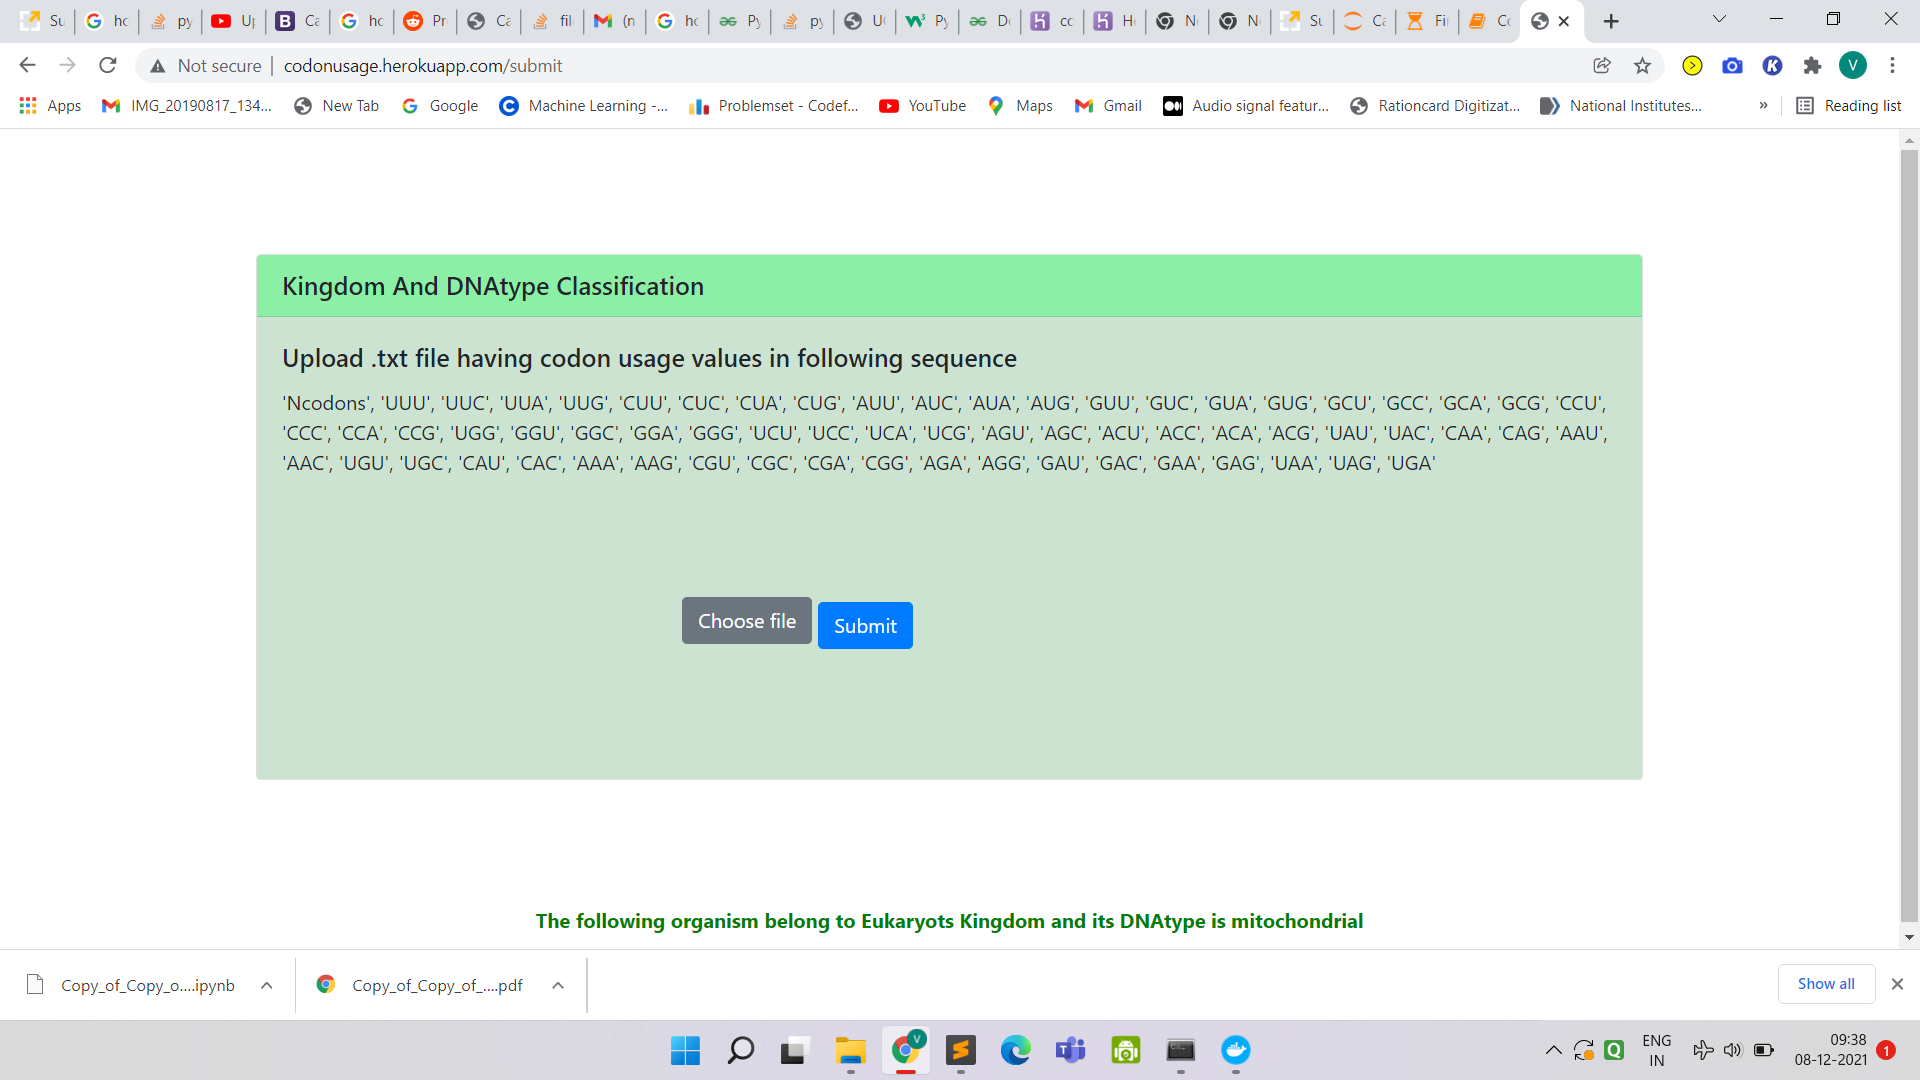

http://codonusage.herokuapp.com/